In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('lego_sets.csv', sep = ',')
df2 = pd.read_csv('lego_population.csv', sep = ',')

data = [df1,df2]
concatenated_df = pd.concat(data, ignore_index=True) #połączenie obu data frames
selected_columns_df = concatenated_df[['ages', 'theme_name', 'set_name', 'piece_count']] #wybór kolumn
filtered_df = selected_columns_df.query('ages not in ["Ages_NA"]') #odrzucenie wierszy z brakiem informacji o grupie wiekowej
age_category = ['16+', '10+', '11+', '12+', '14+', '18+', '1½+', '2+', '4+', '6+', '7+', '8+', '9+']  #lista pożądanych kategorii wiekowych
filtered_df = selected_columns_df[selected_columns_df['ages'].isin(age_category)] #odrzucenie innych kategorii wiekowych poprzez wybór tych z listy

average_piece_count_by_ages = filtered_df.groupby('ages')['piece_count'].mean() #obliczenie średniej ilości klocków dla każdej grupy
average_piece_count_by_ages = average_piece_count_by_ages.astype(int) #zmiana wyników na liczby całkowite, zważając na to że w zestawach są tylko "całkowite" liczby ilości klocków

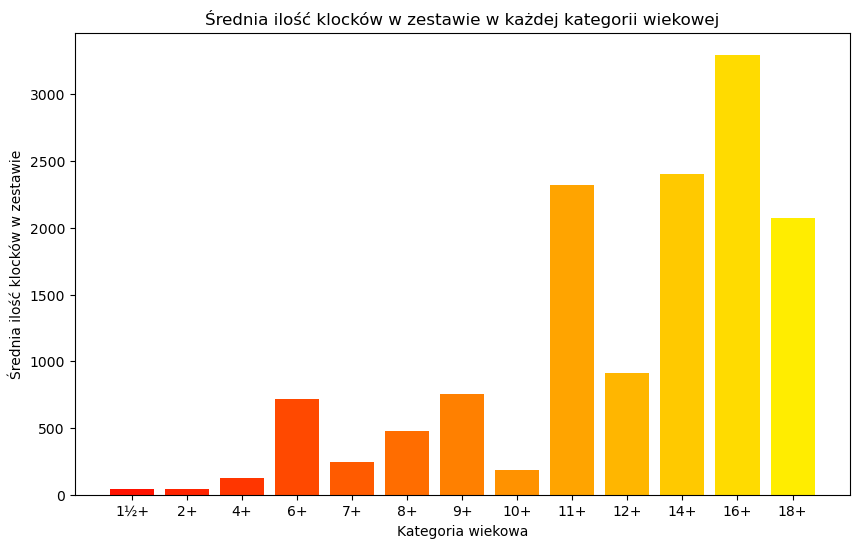

<Figure size 640x480 with 0 Axes>

In [4]:
order = ['1½+','2+', '4+', '6+', '7+', '8+', '9+', '10+', '11+', '12+', '14+', '16+', '18+'] #zmiana kolejności wartości na osi X
average_piece_count_by_ages = average_piece_count_by_ages.reindex(order)

colors = sns.color_palette("autumn", n_colors=len(average_piece_count_by_ages)) #dobór koloru dla każdej grupy wiekowej

plt.figure(figsize=(10, 6))
plt.bar(average_piece_count_by_ages.index, average_piece_count_by_ages, color=colors)
plt.xlabel('Kategoria wiekowa')
plt.ylabel('Średnia ilość klocków w zestawie')
plt.title('Średnia ilość klocków w zestawie w każdej kategorii wiekowej')
plt.show()

plt.savefig('srednia-ilosc-klockow.jpg')